In [ ]:
import os
import keras
import cv2
import h5py
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
from glob import glob
from keras.models import Model
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from keras.models import Sequential
from tensorflow import keras
from keras.models import load_model
import pickle

In [1]:
train_dir = r'E:\image classification models\train'
test_dir = r'E:\image classification models\test'
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(96, 96),
        batch_size=32,
        classes = ['Valid image','Invalid image'])
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(96, 96),
        batch_size=12,
        classes = ['Valid image','Invalid image'])

NameError: name 'ImageDataGenerator' is not defined

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation=tf.nn.relu,input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    #tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu,padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        1

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [7]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(test_generator.samples/test_generator.batch_size)
hist = model.fit(train_generator,
                    epochs = 3,
                    verbose = 1,
                  steps_per_epoch=steps_per_epoch,
                   validation_data = test_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/3
85/85 [==============================] - 108s 1s/step - loss: 0.0866 - acc: 0.9650 - val_loss: 0.0192 - val_acc: 0.9958
Epoch 2/3
85/85 [==============================] - 38s 444ms/step - loss: 0.0276 - acc: 0.9919 - val_loss: 0.0203 - val_acc: 0.9958
Epoch 3/3
85/85 [==============================] - 38s 452ms/step - loss: 0.0246 - acc: 0.9912 - val_loss: 0.0166 - val_acc: 0.9986


In [8]:
final_loss, final_accuracy = model.evaluate(test_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

60/60 [==============================] - 7s 109ms/step - loss: 0.0166 - acc: 0.9986
Final loss: 0.02
Final accuracy: 99.86%


In [9]:
val_image_batch, val_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (12, 96, 96, 3)


In [10]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Valid Image' 'Invalid Image']


In [11]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (12, 2)


In [12]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Valid Image' 'Valid Image' 'Invalid Image' 'Invalid Image' 'Valid Image'
 'Valid Image' 'Valid Image' 'Invalid Image' 'Invalid Image'
 'Invalid Image' 'Invalid Image' 'Invalid Image']


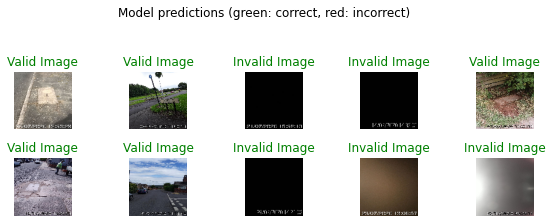

In [13]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [14]:
model.save(r'E:\sample\new_model.h5')

In [26]:
model.save(r'E:\model\new_model.pb')

INFO:tensorflow:Assets written to: E:\model\new_model.pb\assets


In [16]:
mlb = pickle.loads(open(r"E:\sample\mlb.pickle", "rb").read())
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

1. Invalid image
0. Valid image


In [ ]:
E:\july dataset

In [17]:
mlb = pickle.loads(open(r"E:\july dataset\mlb.pickle", "rb").read())
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

1. Invalid image
2. Valid image


C:\Users\muhammed.s\.conda\envs\object\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MultiLabelBinarizer from version 0.23.2 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
